<a href="https://colab.research.google.com/github/JOCRZ/Data-Science-Diploma/blob/main/CustomerChurnPrediction(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction Using ANN

## Build ANN using Keras

In [86]:
import pandas as pd
import numpy as np

In [87]:
data = pd.read_csv('/content/drive/MyDrive/DL Notebooks/Dataset/Churn_Modelling.csv')

In [88]:
data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4307,4308,15702499,Schnaars,770,Spain,Male,46,9,190678.02,1,1,1,14725.36,0
7036,7037,15678882,Hay,540,Germany,Male,37,3,129965.18,1,0,0,19374.08,0
3691,3692,15760244,Ives,590,France,Female,76,5,160979.68,1,0,1,13848.58,0
6806,6807,15795586,McDonald,478,France,Male,35,1,92474.05,1,1,0,178626.07,0
9187,9188,15628863,Calabresi,601,France,Male,38,4,60013.81,1,1,1,38020.05,0


In [89]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [90]:
data.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [92]:
data.duplicated().sum()

0

In [93]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [94]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [95]:
data['Gender'].value_counts()


Male      5457
Female    4543
Name: Gender, dtype: int64

In [96]:
data = pd.get_dummies(data,columns=['Geography','Gender'],drop_first=True)

In [97]:
X = data.drop(columns=['Exited'])
y = data['Exited']

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [99]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(8000, 11) (8000,) (2000, 11) (2000,)


If we doesn't scale the features the model will not converge

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [101]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

keras can create sequential and non sequential models.

In [102]:
model = Sequential()
model.add(Dense(10,activation='relu',input_dim=11)) # Hidden layer 1
model.add(Dense(5,activation='relu')) # Hidden layer 2
model.add(Dense(1,activation='sigmoid')) # output layer

In [103]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                120       
                                                                 
 dense_8 (Dense)             (None, 5)                 55        
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181 (724.00 Byte)
Trainable params: 181 (724.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model compilation stage you define what loss function is going to use and what gradient descent is going to implement.

In [104]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [105]:
history = model.fit(X_train_scaled,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
200/200 [==============================] - 1s 2ms/step - loss: 0.6071 - accuracy: 0.7055 - val_loss: 0.5262 - val_accuracy: 0.7969
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4908 - accuracy: 0.7970 - val_loss: 0.4734 - val_accuracy: 0.7981
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4517 - accuracy: 0.8012 - val_loss: 0.4411 - val_accuracy: 0.8087
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4299 - accuracy: 0.8191 - val_loss: 0.4255 - val_accuracy: 0.8119
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.8230 - val_loss: 0.4150 - val_accuracy: 0.8112
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8270 - val_loss: 0.4062 - val_accuracy: 0.8138
Epoch 7/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4000 - accuracy: 0.8333 - val_loss: 0.3961 - val_accuracy: 0.8275
Epoch 

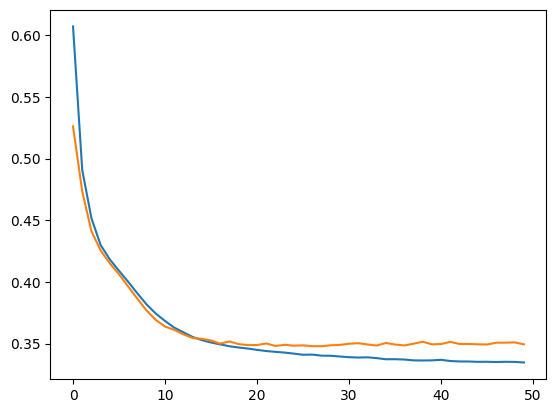

In [106]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

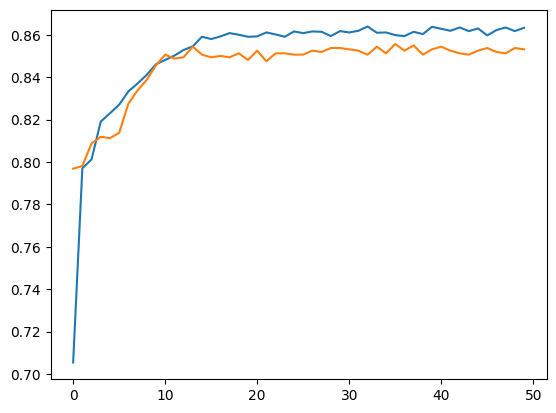

In [107]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [108]:
model.layers[0].get_weights()

[array([[-4.09068656e-04, -3.64604481e-02,  6.12556376e-02,
         -5.50480150e-02, -1.60143793e-01,  1.63566068e-01,
         -4.66809362e-01, -2.96649218e-01, -6.08748803e-03,
          1.06303297e-01],
        [ 5.63426241e-02, -8.65477502e-01, -2.93794960e-01,
          2.99405038e-01,  3.90328630e-03, -6.93895876e-01,
         -1.61637515e-01,  2.60678321e-01,  1.46166772e-01,
         -8.25939775e-02],
        [-1.83902517e-01, -8.74679685e-02,  3.81019115e-02,
         -1.15442172e-01,  3.02410692e-01, -6.76110908e-02,
         -5.59786439e-01, -1.84586152e-01, -5.07647991e-02,
          1.40944461e-03],
        [ 3.31156194e-01, -1.50299311e-01, -3.36460650e-01,
         -1.57364622e-01, -3.02100331e-01, -1.26236275e-01,
          7.01587349e-02,  2.81282365e-01, -8.10676590e-02,
         -7.29242742e-01],
        [ 1.14237845e+00,  1.36751100e-01,  3.06497395e-01,
          6.35211775e-03,  9.96048510e-01, -4.49466780e-02,
         -7.69677937e-01,  2.15808854e-01, -1.099122

In [109]:
model.layers[1].get_weights()

[array([[-0.90046644, -0.24482144, -0.5664097 , -0.26063746,  0.76060045],
        [ 0.05062725,  0.5322092 ,  0.6400218 ,  0.20808698, -0.8205854 ],
        [ 0.18872234, -0.05056123,  0.43840843,  0.24390699,  0.2216425 ],
        [ 0.6763394 , -0.03080419,  0.52050936,  0.65744376,  0.40298828],
        [ 0.6979543 , -0.01135583,  0.11222159, -0.51404566,  0.67106026],
        [-0.17041892,  0.17475842, -0.08915496,  0.7191201 , -0.6134366 ],
        [-0.43639496, -0.88111293,  0.03012898, -0.555307  ,  0.21771401],
        [-0.62484664, -0.2569086 ,  0.14441158,  0.5942236 , -0.0290463 ],
        [ 0.01667181,  0.19299774, -0.5490625 , -0.2798706 ,  0.7554879 ],
        [-0.5099634 ,  0.04155138, -0.71459466, -0.5313481 , -0.08480695]],
       dtype=float32),
 array([ 0.35745186, -0.1374835 ,  0.57998174,  0.48297217, -0.08763257],
       dtype=float32)]

In [110]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 952us/step


To predict threshold you need to plot roc_auc cruve.

In [111]:
y_pred = np.where(y_log > 0.5,1,0)

In [112]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.863

Improve model performance
genearlly keeping hidden layer activateion function as Rellu

Increase the layers nodes
or Increase the layers (can cause overfitting).